In [343]:
import pandas as pd
import matplotlib.pyplot as plt

In [344]:
policeFile = pd.read_csv('policeData.csv')
policeFile.head(5)

incidentNeighborhood = policeFile["INCIDENTNEIGHBORHOOD"]
incidentNeighborhood.head(5)

0                    North Shore
1            Upper Lawrenceville
2              Northview Heights
3    Golden Triangle/Civic Arena
4              Northview Heights
Name: INCIDENTNEIGHBORHOOD, dtype: object

In [345]:
myNeighborhoodDictPoliceData = {}
incidentNeighborhood = incidentNeighborhood.fillna("Unknown Neighborhood")
for neighborhoods in incidentNeighborhood:
    if neighborhoods in myNeighborhoodDictPoliceData:
        myNeighborhoodDictPoliceData[neighborhoods] += 1
    else:
        myNeighborhoodDictPoliceData[neighborhoods] = 1

myNeighborhoodDictPoliceData["Mount Oliver"] += myNeighborhoodDictPoliceData["Mt. Oliver Boro"]
myNeighborhoodDictPoliceData["Mount Oliver"] += myNeighborhoodDictPoliceData["Mt. Oliver Neighborhood"]
del myNeighborhoodDictPoliceData["Mt. Oliver Boro"]
del myNeighborhoodDictPoliceData["Mt. Oliver Neighborhood"]
del myNeighborhoodDictPoliceData["Unknown Neighborhood"]
myNeighborhoodDictPoliceData["Central Business District"] += myNeighborhoodDictPoliceData["Golden Triangle/Civic Arena"]
del myNeighborhoodDictPoliceData["Golden Triangle/Civic Arena"]
myNeighborhoodDictPoliceData["Central Northside"] += myNeighborhoodDictPoliceData["Central North Side"]
del myNeighborhoodDictPoliceData["Central North Side"]
del myNeighborhoodDictPoliceData["Outside City"]
del myNeighborhoodDictPoliceData["Outside County"]
del myNeighborhoodDictPoliceData["Outside State"]
myNeighborhoodDictPoliceData["Troy Hill"] += myNeighborhoodDictPoliceData["Troy Hill-Herrs Island"]
del myNeighborhoodDictPoliceData["Troy Hill-Herrs Island"]
myNeighborhoodDictPoliceData["Mt. Oliver"] = myNeighborhoodDictPoliceData["Mount Oliver"]
del myNeighborhoodDictPoliceData["Mount Oliver"]




for key, value in myNeighborhoodDictPoliceData.items():
    print(key, ":", value)

North Shore : 3728
Upper Lawrenceville : 1670
Northview Heights : 2663
South Side Flats : 19098
Elliott : 2675
Homewood North : 6597
South Side Slopes : 4323
Carrick : 11927
South Oakland : 2442
Bloomfield : 8704
Beechview : 5764
Bluff : 4838
Strip District : 3530
Mount Washington : 7723
East Carnegie : 401
Crafton Heights : 2901
Marshall-Shadeland : 5693
East Liberty : 8451
East Allegheny : 6021
Friendship : 1650
Arlington : 2166
Central Northside : 4041
Spring Hill-City View : 2480
Brighton Heights : 6305
Westwood : 1650
East Hills : 5056
Brookline : 7792
South Shore : 1272
Lower Lawrenceville : 2604
Bedford Dwellings : 2675
Central Oakland : 5229
Garfield : 3532
West End : 1290
West Oakland : 2014
Central Lawrenceville : 4385
Lincoln-Lemington-Belmar : 6865
Sheraden : 6214
Beltzhoover : 2093
Squirrel Hill South : 7809
North Oakland : 4762
Allentown : 5273
Perry North : 3177
Homewood South : 7297
Shadyside : 8773
Manchester : 2281
Squirrel Hill North : 4088
Regent Square : 565
Homewo

<Axes: >

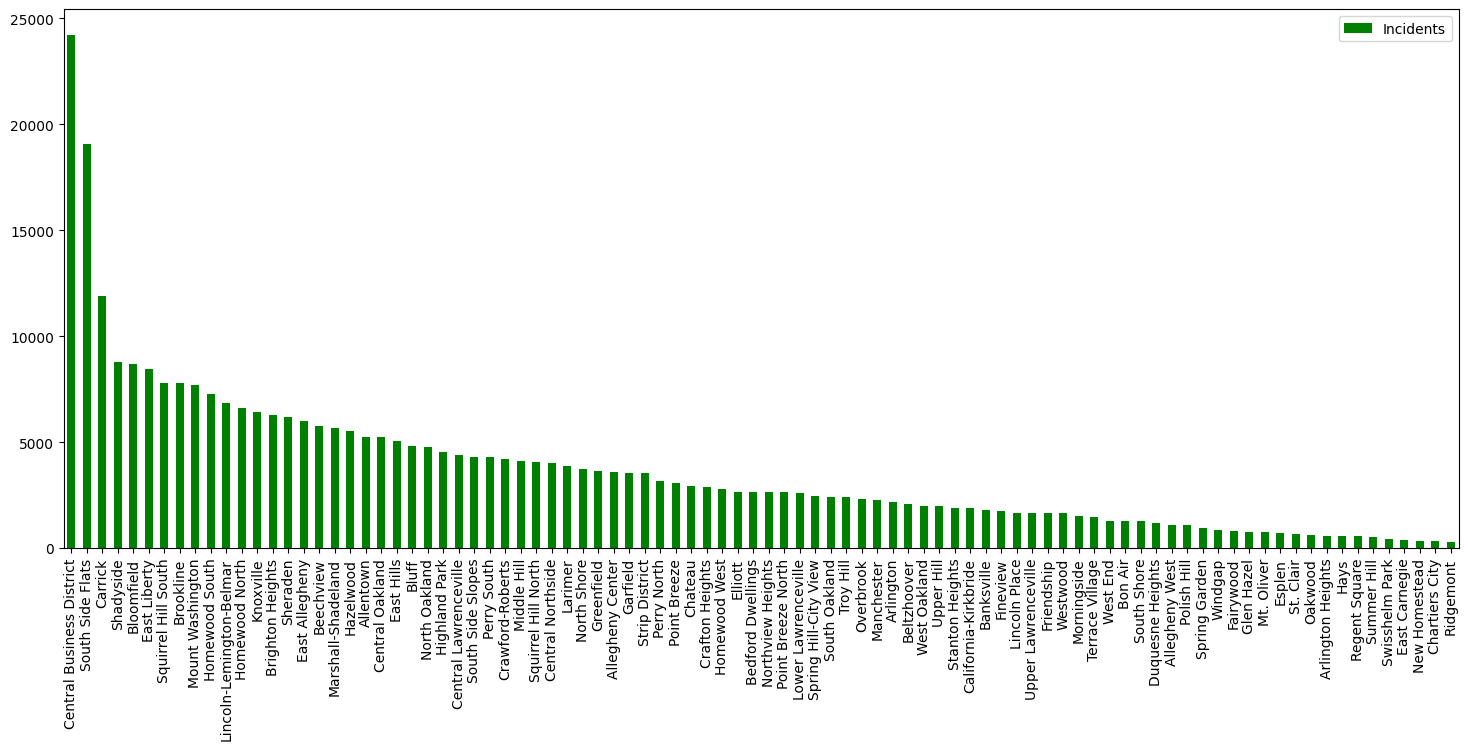

In [346]:
df = pd.DataFrame.from_dict(myNeighborhoodDictPoliceData, orient='index')
df.columns = ["Incidents"]
df.sort_values(by=['Incidents'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
df.plot(    kind='bar',
            y='Incidents',
            color='green',)

In [347]:
fire_incidents = pd.read_csv('fire_incidents_data.csv')
fire_incidents = fire_incidents[fire_incidents['neighborhood'].notna()]

In [348]:
fireDict = {}

for index, row in fire_incidents.iterrows():
    if row['neighborhood'] in fireDict:
        fireDict[row['neighborhood']] += 1
    else:
        fireDict[row['neighborhood']] = 1

del fireDict["Mount Oliver Borough"]

In [349]:
greenlandData = pd.read_csv('greenlandData.csv')
greenlandData = greenlandData.fillna(0)
greenlandData.head(5)

,Responsibility_Parks or Operations,Facility,Division,Total Acreage,Maintainable Acreage,Shelter,Rec Center,Senior Center,Pool,Spray Pool,...,Grandstand,Control Link for Basketball Courts,Control Link for Tennis Court,Control Linkl for Hockey Court,Dek Hockey Court,Dog Park,Spray Park,Ownership of Facility,Benches,Tables
0,Operations,Bates St Triangle,3.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0
1,Operations,Baum Negley Triangle,2.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0
2,Operations,Bedford Strip,3.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0
3,Operations,Beechview Monument,5.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,No,No,No,0.0,0.0,0.0,0.0,2.0,0.0
4,Operations,Brookline Monument,4.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0


In [350]:
myNeighborhoodDictGreenlandData = {}
for rowNum in range(0,greenlandData.shape[0]):
    neighborhood = greenlandData.iloc[rowNum,27]
    totalAcreage = float(greenlandData.iloc[rowNum,3])
    if neighborhood == 0:
        pass
    elif neighborhood in myNeighborhoodDictGreenlandData:
        myNeighborhoodDictGreenlandData[neighborhood] += totalAcreage
    else:
        myNeighborhoodDictGreenlandData[neighborhood] = totalAcreage

for key, value in myNeighborhoodDictGreenlandData.items():
    print(key, ":", value)

South Oakland : 0.30000000000000004
East Liberty : 4.1499999999999995
Crawford Roberts : 0.3
Beechview : 0.1
Brookline : 0.1
Central Business District : 1.24
Point Breeze : 1.1199999999999999
North Oakland : 0.1
Point Breeze North : 1.4
Squirrel Hill South : 0.4
Central Oakland : 1.7000000000000002
Polish Hill : 0.01
Regent Square : 0.01
Sheraden : 0.1
Swisshelm Park : 0.05


In [351]:
for neighborhood in myNeighborhoodDictGreenlandData:
    if neighborhood in myNeighborhoodDictPoliceData:
        print(f"This neighborhood is in both of them: {neighborhood}")

myNeighborhoodDictGreenlandData["Crawford-Roberts"] = myNeighborhoodDictGreenlandData["Crawford Roberts"]
del myNeighborhoodDictGreenlandData['Crawford Roberts']

This neighborhood is in both of them: South Oakland
This neighborhood is in both of them: East Liberty
This neighborhood is in both of them: Beechview
This neighborhood is in both of them: Brookline
This neighborhood is in both of them: Central Business District
This neighborhood is in both of them: Point Breeze
This neighborhood is in both of them: North Oakland
This neighborhood is in both of them: Point Breeze North
This neighborhood is in both of them: Squirrel Hill South
This neighborhood is in both of them: Central Oakland
This neighborhood is in both of them: Polish Hill
This neighborhood is in both of them: Regent Square
This neighborhood is in both of them: Sheraden
This neighborhood is in both of them: Swisshelm Park


<Axes: >

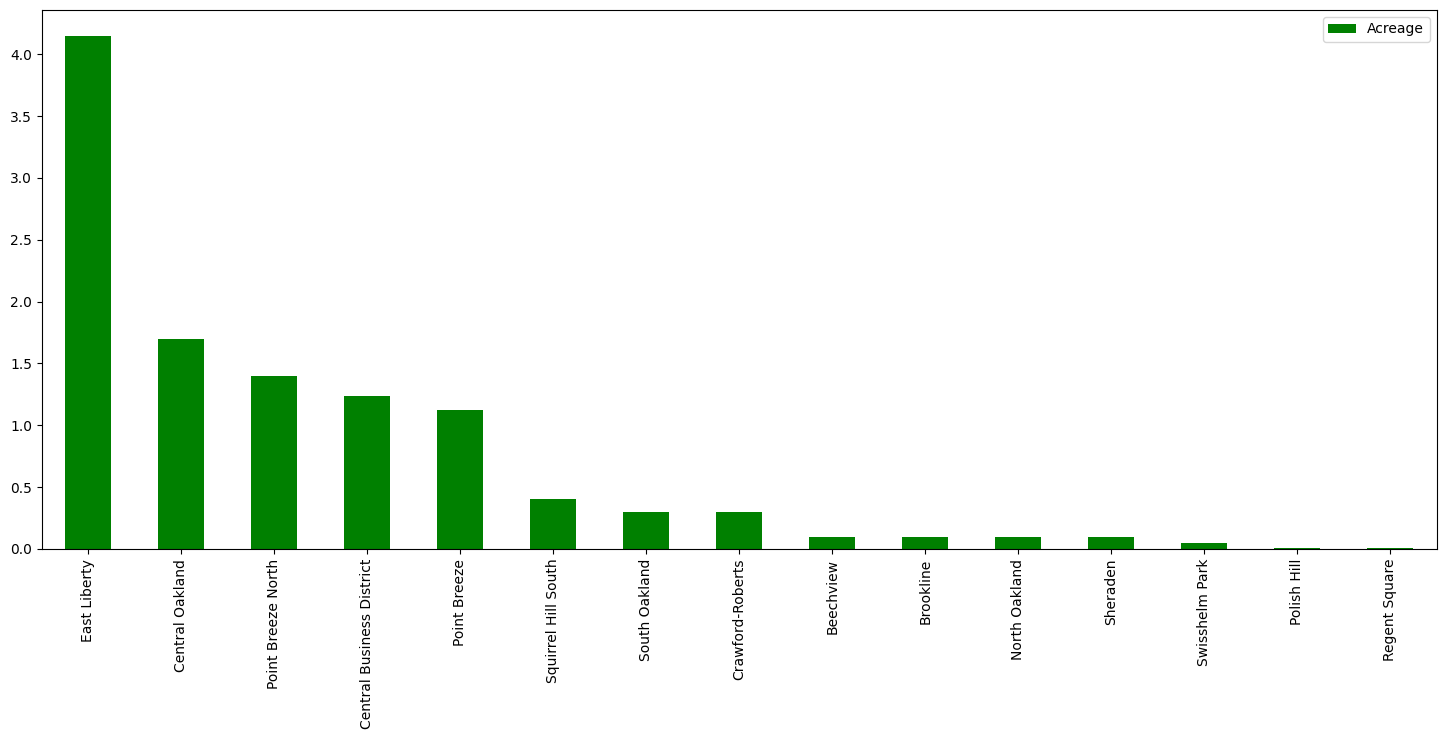

In [352]:
gdf = pd.DataFrame.from_dict(myNeighborhoodDictGreenlandData, orient='index')
gdf.columns = ["Acreage"]
gdf.sort_values(by=['Acreage'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
gdf.plot(   kind='bar',
            y='Acreage',
            color='green',)

In [353]:
for neighborhood in myNeighborhoodDictPoliceData:
    if neighborhood in fireDict:
        print(f"This neighborhood is in both of them: {neighborhood}")
    else:
        print(f"This neighborhood is NOT in both of them: {neighborhood}")

print(len(myNeighborhoodDictPoliceData))

This neighborhood is in both of them: North Shore
This neighborhood is in both of them: Upper Lawrenceville
This neighborhood is in both of them: Northview Heights
This neighborhood is in both of them: South Side Flats
This neighborhood is in both of them: Elliott
This neighborhood is in both of them: Homewood North
This neighborhood is in both of them: South Side Slopes
This neighborhood is in both of them: Carrick
This neighborhood is in both of them: South Oakland
This neighborhood is in both of them: Bloomfield
This neighborhood is in both of them: Beechview
This neighborhood is in both of them: Bluff
This neighborhood is in both of them: Strip District
This neighborhood is in both of them: Mount Washington
This neighborhood is in both of them: East Carnegie
This neighborhood is in both of them: Crafton Heights
This neighborhood is in both of them: Marshall-Shadeland
This neighborhood is in both of them: East Liberty
This neighborhood is in both of them: East Allegheny
This neighbo

In [354]:
crimeMax = max(myNeighborhoodDictPoliceData.values())
greenlandMax = max(myNeighborhoodDictGreenlandData.values())

print(f"Here is the max for the crime incident data: {crimeMax} and here is the max for greenland data: {greenlandMax}")


Here is the max for the crime incident data: 24221 and here is the max for greenland data: 4.1499999999999995


North Shore : 0.8460839767144214
Upper Lawrenceville : 0.931051566822179
Northview Heights : 0.890054085297882
South Side Flats : 0.21151067255687217
Elliott : 0.889558647454688
Homewood North : 0.7276330457041411
South Side Slopes : 0.8215185169893894
Carrick : 0.5075760703521737
South Oakland : 0.8991783989100367
Bloomfield : 0.6406424177366747
Beechview : 0.7620246893191858
Bluff : 0.8002559762189836
Strip District : 0.8542587011271211
Mount Washington : 0.681144461417778
East Carnegie : 0.9834441187399364
Crafton Heights : 0.8802279014078692
Marshall-Shadeland : 0.7649560298914165
East Liberty : 0.65108789893068
East Allegheny : 0.7514140621774493
Friendship : 0.9318772965608356
Arlington : 0.9105734693034969
Central Northside : 0.8331613063044465
Spring Hill-City View : 0.8976095124065894
Brighton Heights : 0.7396886998885265
Westwood : 0.9318772965608356
East Hills : 0.7912555220676273
Brookline : 0.6782956938194129
South Shore : 0.9474835886214442
Lower Lawrenceville : 0.8924899

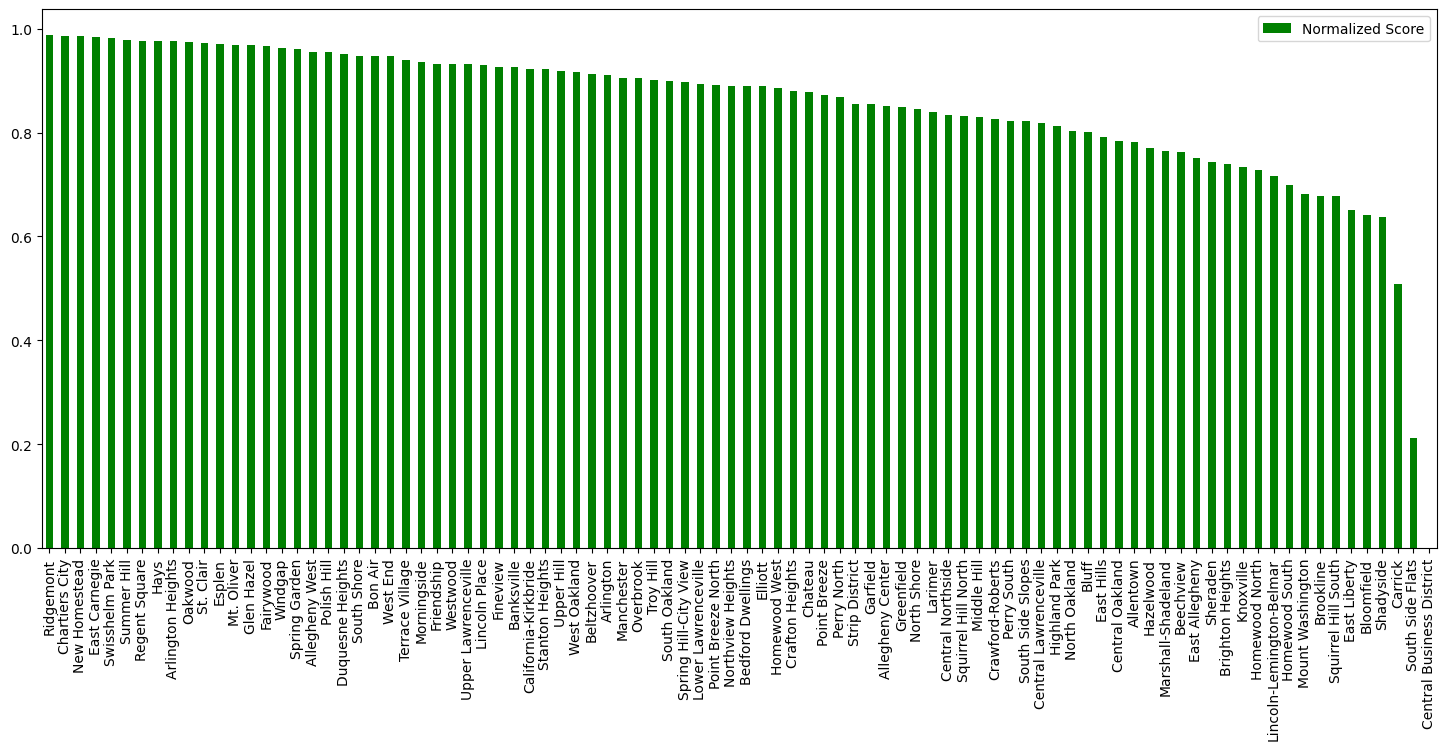

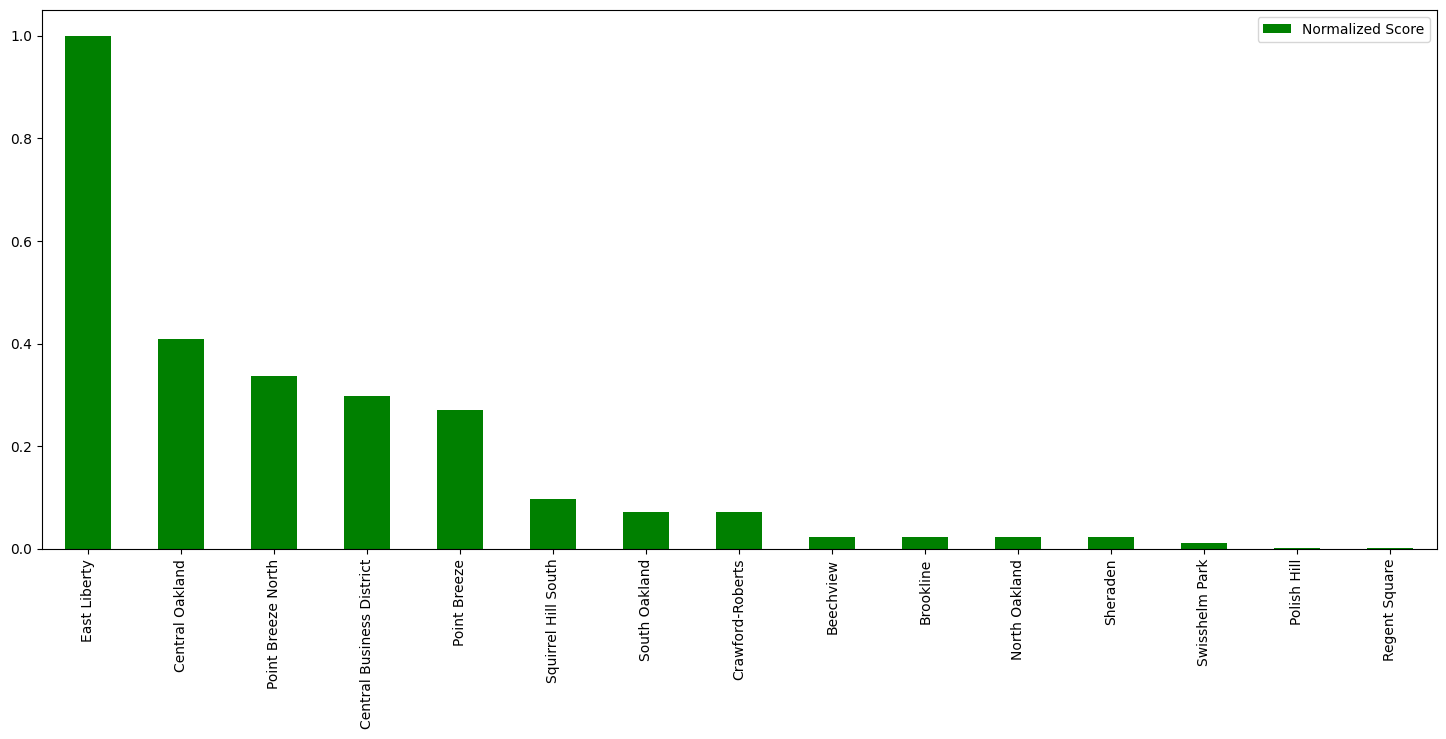

In [355]:
for keys in myNeighborhoodDictPoliceData:
    myNeighborhoodDictPoliceData[keys] = (1 - (myNeighborhoodDictPoliceData[keys]/crimeMax))

ndf = pd.DataFrame.from_dict(myNeighborhoodDictPoliceData, orient='index')
ndf.columns = ["Normalized Score"]
ndf.sort_values(by=['Normalized Score'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
ndf.plot(   kind='bar',
            y='Normalized Score',
            color='green',)

for keys in myNeighborhoodDictGreenlandData:
    myNeighborhoodDictGreenlandData[keys] = myNeighborhoodDictGreenlandData[keys]/greenlandMax

ngdf = pd.DataFrame.from_dict(myNeighborhoodDictGreenlandData, orient='index')
ngdf.columns = ["Normalized Score"]
ngdf.sort_values(by=['Normalized Score'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
ngdf.plot(   kind='bar',
            y='Normalized Score',
            color='green',)

for key, value in myNeighborhoodDictPoliceData.items():
    print(key, ":", value)

for key, value in myNeighborhoodDictGreenlandData.items():
    print(key, ":", value)

In [356]:
for neighborhoods in myNeighborhoodDictPoliceData:
    if neighborhoods in myNeighborhoodDictGreenlandData:
        pass
    else:
        myNeighborhoodDictGreenlandData[neighborhoods] = 0


for key, value in myNeighborhoodDictGreenlandData.items():
    print(key, ":", value)

South Oakland : 0.07228915662650605
East Liberty : 1.0
Beechview : 0.02409638554216868
Brookline : 0.02409638554216868
Central Business District : 0.29879518072289163
Point Breeze : 0.26987951807228916
North Oakland : 0.02409638554216868
Point Breeze North : 0.3373493975903615
Squirrel Hill South : 0.09638554216867472
Central Oakland : 0.40963855421686757
Polish Hill : 0.0024096385542168677
Regent Square : 0.0024096385542168677
Sheraden : 0.02409638554216868
Swisshelm Park : 0.01204819277108434
Crawford-Roberts : 0.07228915662650603
North Shore : 0
Upper Lawrenceville : 0
Northview Heights : 0
South Side Flats : 0
Elliott : 0
Homewood North : 0
South Side Slopes : 0
Carrick : 0
Bloomfield : 0
Bluff : 0
Strip District : 0
Mount Washington : 0
East Carnegie : 0
Crafton Heights : 0
Marshall-Shadeland : 0
East Allegheny : 0
Friendship : 0
Arlington : 0
Central Northside : 0
Spring Hill-City View : 0
Brighton Heights : 0
Westwood : 0
East Hills : 0
South Shore : 0
Lower Lawrenceville : 0
Be

In [357]:
myNeighborhoodDict = {}

for keys in myNeighborhoodDictGreenlandData:
    myNeighborhoodDict[keys] = (myNeighborhoodDictGreenlandData[keys] + myNeighborhoodDictPoliceData[keys])

for key, value in myNeighborhoodDict.items():
    print(key, ":", value)

South Oakland : 0.9714675555365427
East Liberty : 1.65108789893068
Beechview : 0.7861210748613544
Brookline : 0.7023920793615815
Central Business District : 0.29879518072289163
Point Breeze : 1.1430061437277121
North Oakland : 0.827490134768047
Point Breeze North : 1.228270499113833
Squirrel Hill South : 0.7739793657102295
Central Oakland : 1.1937515140451158
Polish Hill : 0.9572422218497042
Regent Square : 0.9790827734371697
Sheraden : 0.7675421557415824
Swisshelm Park : 0.993758279059842
Crawford-Roberts : 0.8990097709694316
North Shore : 0.8460839767144214
Upper Lawrenceville : 0.931051566822179
Northview Heights : 0.890054085297882
South Side Flats : 0.21151067255687217
Elliott : 0.889558647454688
Homewood North : 0.7276330457041411
South Side Slopes : 0.8215185169893894
Carrick : 0.5075760703521737
Bloomfield : 0.6406424177366747
Bluff : 0.8002559762189836
Strip District : 0.8542587011271211
Mount Washington : 0.681144461417778
East Carnegie : 0.9834441187399364
Crafton Heights : 

<Axes: >

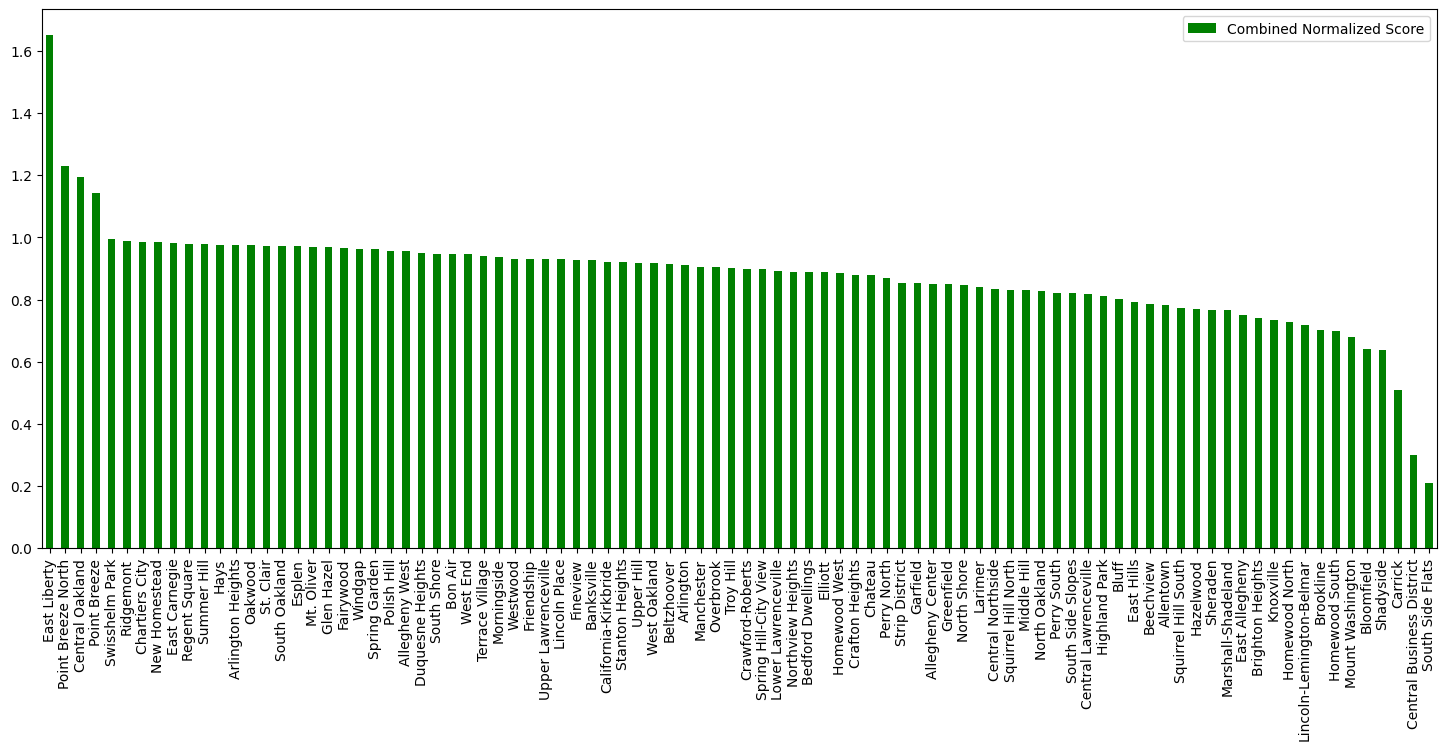

In [358]:
cngdf = pd.DataFrame.from_dict(myNeighborhoodDict, orient='index')
cngdf.columns = ["Combined Normalized Score"]
cngdf.sort_values(by=['Combined Normalized Score'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
cngdf.plot(     kind='bar',
                y='Combined Normalized Score',
                color='green',)